<a href="https://colab.research.google.com/github/ath10101/gh-pages/blob/master/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1 Data acquiring and processing


In [ ]:
# Install the Chinese stock data Python package 
! pip install akshare -i http://mirrors.aliyun.com/pypi/simple/ --trusted-host=mirrors.aliyun.com  --upgrade --quiet

In [ ]:
import akshare as ak

### Shanghai index
shanghai_index_daily_df = ak.stock_zh_index_daily(symbol="sh000001")
print(shanghai_index_daily_df)

            date      open      high       low     close       volume
0     1990-12-19    96.050    99.980    95.790    99.980       126000
1     1990-12-20   104.300   104.390    99.980   104.390        19700
2     1990-12-21   109.070   109.130   103.730   109.130         2800
3     1990-12-24   113.570   114.550   109.130   114.550         3200
4     1990-12-25   120.090   120.250   114.550   120.250         1500
...          ...       ...       ...       ...       ...          ...
7842  2023-01-30  3308.869  3310.490  3266.758  3269.318  35332582900
7843  2023-01-31  3266.144  3277.252  3252.015  3255.669  30016295700
7844  2023-02-01  3262.196  3284.922  3245.411  3284.921  33950941000
7845  2023-02-02  3291.783  3295.764  3272.414  3285.671  33341313300
7846  2023-02-03  3275.658  3275.658  3235.353  3263.406  29334281400

[7847 rows x 6 columns]


In [ ]:
### SSE 50
SSE50_index_daily_df = ak.stock_zh_index_daily(symbol="sh000016")
print(SSE50_index_daily_df)

            date      open      high       low     close      volume
0     2004-01-02   996.996  1021.568   993.892  1011.347     8064653
1     2004-01-05  1008.279  1060.898  1008.279  1060.801  1446818000
2     2004-01-06  1059.141  1086.694  1059.095  1075.656  1699133400
3     2004-01-07  1075.562  1095.841  1070.980  1086.303  1372941900
4     2004-01-08  1087.680  1108.291  1082.509  1102.662  1078042700
...          ...       ...       ...       ...       ...         ...
4631  2023-01-30  2895.355  2895.355  2835.653  2839.122  4202651800
4632  2023-01-31  2842.518  2853.899  2804.979  2807.952  3003290000
4633  2023-02-01  2819.180  2820.874  2780.887  2820.874  3755598700
4634  2023-02-02  2828.531  2828.531  2798.352  2811.847  3406447500
4635  2023-02-03  2795.109  2795.109  2753.058  2774.801  3100746000

[4636 rows x 6 columns]


In [ ]:
### CSI300
CSI300_index_daily_df = ak.stock_zh_index_daily(symbol="sh000300")
print(CSI300_index_daily_df)

            date      open      high       low     close       volume
0     2002-01-04  1316.455  1316.455  1316.455  1316.455            0
1     2002-01-07  1302.084  1302.084  1302.084  1302.084            0
2     2002-01-08  1292.714  1292.714  1292.714  1292.714            0
3     2002-01-09  1272.645  1272.645  1272.645  1272.645            0
4     2002-01-10  1281.261  1281.261  1281.261  1281.261            0
...          ...       ...       ...       ...       ...          ...
5109  2023-01-30  4267.625  4268.152  4197.860  4201.345  16460706400
5110  2023-01-31  4200.581  4212.735  4153.048  4156.858  12455083500
5111  2023-02-01  4170.132  4195.933  4137.766  4195.933  14100895400
5112  2023-02-02  4207.412  4207.412  4170.557  4181.149  13382373600
5113  2023-02-03  4162.026  4162.026  4103.165  4141.632  11704122100

[5114 rows x 6 columns]


In [ ]:
# only keep date and close and calculate the returns
shanghai_index = shanghai_index_daily_df[['date','close']]
shanghai_index['returns'] = (shanghai_index['close'] - shanghai_index['close'].shift(1))/(shanghai_index['close'].shift(1))
shanghai_index = shanghai_index.dropna(axis=0,how='any')
shanghai_index = shanghai_index.reset_index(drop=True)
#
SSE50 = SSE50_index_daily_df[['date','close']]
SSE50['returns'] = (SSE50['close'] - SSE50['close'].shift(1))/(SSE50['close'].shift(1))
SSE50 = SSE50.dropna(axis=0,how='any')
SSE50 = SSE50.reset_index(drop=True)
#
CSI300 = CSI300_index_daily_df[['date','close']]
CSI300['returns'] = (CSI300['close'] - CSI300['close'].shift(1))/(CSI300['close'].shift(1))
CSI300 = CSI300.dropna(axis=0,how='any')
CSI300 = CSI300.reset_index(drop=True)

<ipython-input-5-c69df9b25297>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shanghai_index['returns'] = (shanghai_index['close'] - shanghai_index['close'].shift(1))/(shanghai_index['close'].shift(1))
<ipython-input-5-c69df9b25297>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SSE50['returns'] = (SSE50['close'] - SSE50['close'].shift(1))/(SSE50['close'].shift(1))
<ipython-input-5-c69df9b25297>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [ ]:
shanghai_index

,date,close,returns
0,1990-12-20,104.390,0.044109
1,1990-12-21,109.130,0.045407
2,1990-12-24,114.550,0.049666
3,1990-12-25,120.250,0.049760
4,1990-12-26,125.270,0.041746
...,...,...,...
7841,2023-01-30,3269.318,0.001380
7842,2023-01-31,3255.669,-0.004175
7843,2023-02-01,3284.921,0.008985
7844,2023-02-02,3285.671,0.000228


# Part 2 Preliminary analysis

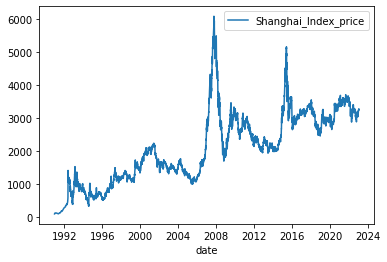

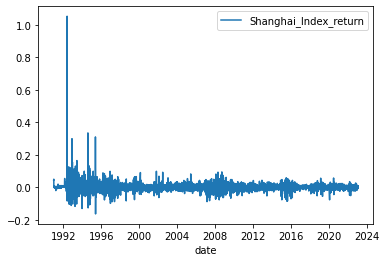

In [ ]:
import matplotlib.pyplot as plt
### Price 
shanghai_index.plot(x='date', y = 'close', kind='line',label='Shanghai_Index_price')
### Returns
shanghai_index.plot(x='date', y = 'returns', kind='line',label='Shanghai_Index_return')

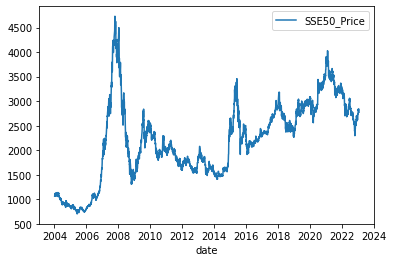

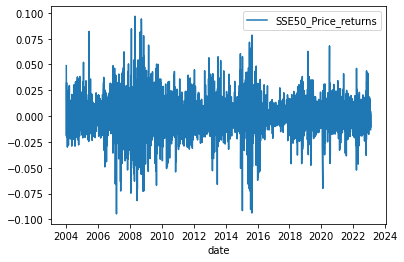

In [ ]:
# Price
SSE50.plot(x='date', y = 'close', kind='line',label='SSE50_Price')
# Returns
SSE50.plot(x='date', y = 'returns', kind='line',label='SSE50_Price_returns')

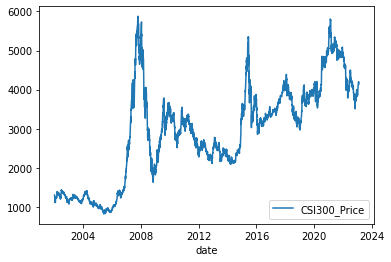

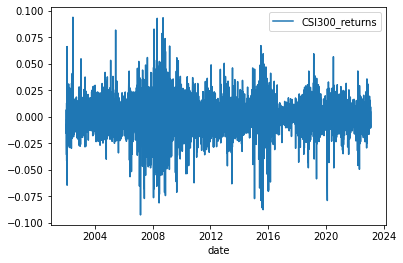

In [ ]:
# Price
CSI300.plot(x='date', y = 'close', kind='line',label='CSI300_Price')
# Returns
CSI300.plot(x='date', y = 'returns', kind='line',label='CSI300_returns')

#Part 3 Regime Shift Analysis
## 3.1 
The bull regime is considered to be 10% higher than the previous lowest point, and the bear
regime is considered to be 10% lower than the previous highest point.

3.1.1 Shanghai Index analysis

In [ ]:
shanghai_index

,date,close,returns
0,1990-12-20,104.390,0.044109
1,1990-12-21,109.130,0.045407
2,1990-12-24,114.550,0.049666
3,1990-12-25,120.250,0.049760
4,1990-12-26,125.270,0.041746
...,...,...,...
7841,2023-01-30,3269.318,0.001380
7842,2023-01-31,3255.669,-0.004175
7843,2023-02-01,3284.921,0.008985
7844,2023-02-02,3285.671,0.000228


              min         max
bulln                        
1      1990-12-21  2007-10-15


Text(0.5, 1.0, 'Shanghai Index with Bull Markets (> 10% Increases)')

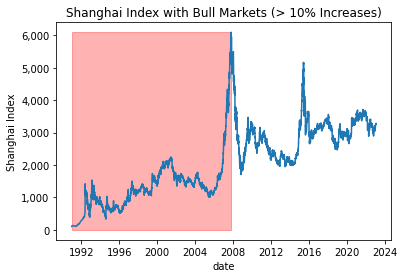

In [ ]:
### Copy the data for other use
shanghai_index_temp = shanghai_index.copy()
# identiy bull regime for shanghai_index
## make date as the index
shanghai_index = shanghai_index.set_index(shanghai_index['date'], drop=True, append=False, inplace=False, verify_integrity=False)
# Just need the 
shanghai_index = shanghai_index[['close']].copy()
shanghai_index['dd'] = shanghai_index['close'].div(shanghai_index['close'].cummin()).sub(1)
shanghai_index['ddn'] = ((shanghai_index['dd'] > 0.) & (shanghai_index['dd'].shift() == 0.)).cumsum()
shanghai_index['ddmax'] = shanghai_index.groupby('ddn')['dd'].transform('max')
shanghai_index['bull'] = (shanghai_index['ddmax'] > 0.1) & (shanghai_index['ddmax'] > shanghai_index.groupby('ddn')['dd'].transform('cummax'))
shanghai_index['bulln'] = ((shanghai_index['bull'] == True) & (shanghai_index['bull'].shift() == False)).cumsum()

bulls = shanghai_index.reset_index().query('bull == True').groupby('bulln')['date'].agg(['min', 'max'])
print(bulls)

shanghai_index['close'].plot()
for i, row in bulls.iterrows():
    plt.fill_between(row, shanghai_index['close'].max(), alpha= 0.3, color='r')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylabel('Shanghai Index')
plt.title('Shanghai Index with Bull Markets (> 10% Increases)')

              min         max
bearn                        
1      1991-02-25  1991-05-15
2      1992-05-26  1992-11-16
3      1993-02-16  1994-07-28
4      1999-06-30  1999-12-24
5      2000-08-22  2000-09-22
6      2001-01-11  2001-02-21
7      2001-06-14  2005-07-08
8      2007-01-25  2007-02-02
9      2007-05-30  2007-07-04
10     2007-10-17  2008-11-03


Text(0.5, 1.0, 'Shanhai Index with Bear Markets More than 10% decreases)')

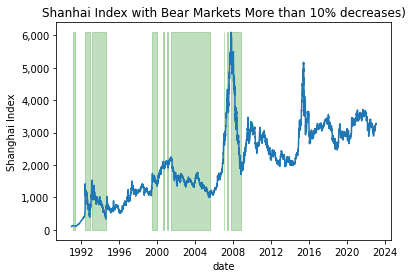

In [ ]:
shanghai_index = shanghai_index_temp.copy()
# identiy bear regime for shanghai_index
shanghai_index = shanghai_index.set_index(shanghai_index['date'], drop=True, append=False, inplace=False, verify_integrity=False)
# Just need the 
shanghai_index = shanghai_index[['close']].copy()

shanghai_index['dd'] = shanghai_index['close'].div(shanghai_index['close'].cummax()).sub(1)
shanghai_index['ddn'] = ((shanghai_index['dd'] < 0.) & (shanghai_index['dd'].shift() == 0.)).cumsum()
shanghai_index['ddmax'] = shanghai_index.groupby('ddn')['dd'].transform('min')

shanghai_index['bear'] = (shanghai_index['ddmax'] < -0.1) & (shanghai_index['ddmax'] < shanghai_index.groupby('ddn')['dd'].transform('cummin'))
shanghai_index['bearn'] = ((shanghai_index['bear'] == True) & (shanghai_index['bear'].shift() == False)).cumsum()
bears = shanghai_index.reset_index().query('bear == True').groupby('bearn')['date'].agg(['min', 'max'])
print(bears)

shanghai_index['close'].plot()

for i, row in bears.iterrows():
    plt.fill_between(row, shanghai_index['close'].max(), alpha=0.25, color='g')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylabel('Shanghai Index')
plt.title('Shanhai Index with Bear Markets More than 10% decreases)')

3.1.2 SSE50 Analysis


In [ ]:
SSE50

,date,close,returns
0,2004-01-05,1060.801,0.048899
1,2004-01-06,1075.656,0.014004
2,2004-01-07,1086.303,0.009898
3,2004-01-08,1102.662,0.015059
4,2004-01-09,1081.785,-0.018933
...,...,...,...
4630,2023-01-30,2839.122,0.000816
4631,2023-01-31,2807.952,-0.010979
4632,2023-02-01,2820.874,0.004602
4633,2023-02-02,2811.847,-0.003200


              min         max
bulln                        
1      2004-09-14  2004-09-22
2      2005-01-21  2005-02-21
3      2005-06-06  2007-10-15


Text(0.5, 1.0, 'SSE50 Index with Bull Markets (> 10% Increases)')

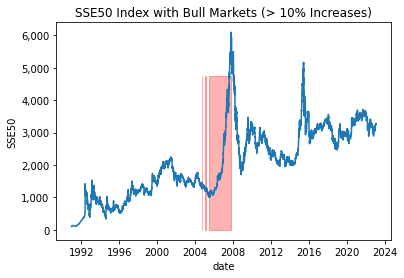

In [ ]:
### Copy the data for other use
SSE50_temp = SSE50.copy()
# identiy bull regime for SSE50
## make date as the index
SSE50 = SSE50.set_index(SSE50['date'], drop=True, append=False, inplace=False, verify_integrity=False)
# Just need the 
SSE50 = SSE50[['close']].copy()
SSE50['dd'] = SSE50['close'].div(SSE50['close'].cummin()).sub(1)
SSE50['ddn'] = ((SSE50['dd'] > 0.) & (SSE50['dd'].shift() == 0.)).cumsum()
SSE50['ddmax'] = SSE50.groupby('ddn')['dd'].transform('max')
SSE50['bull'] = (SSE50['ddmax'] > 0.1) & (SSE50['ddmax'] > SSE50.groupby('ddn')['dd'].transform('cummax'))
SSE50['bulln'] = ((SSE50['bull'] == True) & (SSE50['bull'].shift() == False)).cumsum()

bulls = SSE50.reset_index().query('bull == True').groupby('bulln')['date'].agg(['min', 'max'])
print(bulls)

shanghai_index['close'].plot()
for i, row in bulls.iterrows():
    plt.fill_between(row, SSE50['close'].max(), alpha= 0.3, color='r')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylabel('SSE50')
plt.title('SSE50 Index with Bull Markets (> 10% Increases)')

              min         max
bearn                        
1      2004-03-17  2005-06-02
2      2007-01-30  2007-02-02
3      2007-05-30  2007-06-01
4      2007-06-19  2007-07-04
5      2007-10-17  2008-10-24


Text(0.5, 1.0, 'SSE50 with Bear Markets More Than 10% Decreases)')

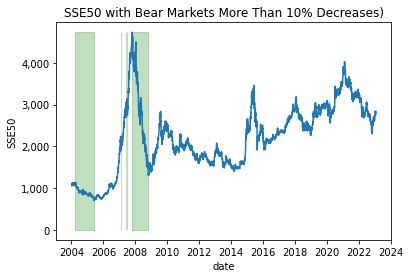

In [ ]:
SSE50 = SSE50_temp.copy()
# identiy bear regime for shanghai_index
SSE50 = SSE50.set_index(SSE50['date'], drop=True, append=False, inplace=False, verify_integrity=False)
# Just need the 
SSE50 = SSE50[['close']].copy()

SSE50['dd'] = SSE50['close'].div(SSE50['close'].cummax()).sub(1)
SSE50['ddn'] = ((SSE50['dd'] < 0.) & (SSE50['dd'].shift() == 0.)).cumsum()
SSE50['ddmax'] = SSE50.groupby('ddn')['dd'].transform('min')

SSE50['bear'] = (SSE50['ddmax'] < -0.1) & (SSE50['ddmax'] < SSE50.groupby('ddn')['dd'].transform('cummin'))
SSE50['bearn'] = ((SSE50['bear'] == True) & (SSE50['bear'].shift() == False)).cumsum()
bears = SSE50.reset_index().query('bear == True').groupby('bearn')['date'].agg(['min', 'max'])
print(bears)

SSE50['close'].plot()

for i, row in bears.iterrows():
    plt.fill_between(row, SSE50['close'].max(), alpha=0.25, color='g')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylabel('SSE50')
plt.title('SSE50 with Bear Markets More Than 10% Decreases)')

3.1.3 CSI300 Analysis

In [ ]:
CSI300

,date,close,returns
0,2002-01-07,1302.084,-0.010916
1,2002-01-08,1292.714,-0.007196
2,2002-01-09,1272.645,-0.015525
3,2002-01-10,1281.261,0.006770
4,2002-01-11,1249.814,-0.024544
...,...,...,...
5108,2023-01-30,4201.345,0.004739
5109,2023-01-31,4156.858,-0.010589
5110,2023-02-01,4195.933,0.009400
5111,2023-02-02,4181.149,-0.003523


              min         max
bulln                        
1      2002-01-22  2002-06-27
2      2003-01-06  2004-04-05
3      2004-09-14  2004-09-22
4      2005-06-06  2007-10-15


Text(0.5, 1.0, 'CSI300 Index Bull Regimess (More Than 10% Increases)')

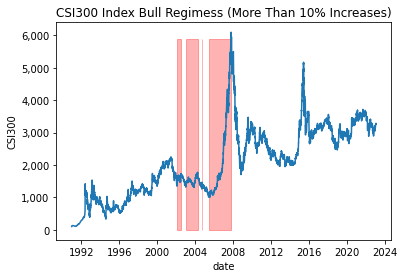

In [ ]:
### Copy the data for other use
CSI300_temp = CSI300.copy()
# identiy bull regime for CSI300
## make date as the index
CSI300 = CSI300.set_index(CSI300['date'], drop=True, append=False, inplace=False, verify_integrity=False)
# Just need the 
CSI300 = CSI300[['close']].copy()
CSI300['dd'] = CSI300['close'].div(CSI300['close'].cummin()).sub(1)
CSI300['ddn'] = ((CSI300['dd'] > 0.) & (CSI300['dd'].shift() == 0.)).cumsum()
CSI300['ddmax'] = CSI300.groupby('ddn')['dd'].transform('max')
CSI300['bull'] = (CSI300['ddmax'] > 0.1) & (CSI300['ddmax'] > CSI300.groupby('ddn')['dd'].transform('cummax'))
CSI300['bulln'] = ((CSI300['bull'] == True) & (CSI300['bull'].shift() == False)).cumsum()

bulls = CSI300.reset_index().query('bull == True').groupby('bulln')['date'].agg(['min', 'max'])
print(bulls)

shanghai_index['close'].plot()
for i, row in bulls.iterrows():
    plt.fill_between(row, CSI300['close'].max(), alpha= 0.3, color='r')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylabel('CSI300')
plt.title('CSI300 Index Bull Regimess (More Than 10% Increases)')

              min         max
bearn                        
1      2002-01-08  2002-01-18
2      2002-03-22  2002-06-04
3      2002-07-01  2005-06-02
4      2007-01-30  2007-02-02
5      2007-05-30  2007-06-01
6      2007-06-20  2007-07-04
7      2007-10-17  2008-11-03


Text(0.5, 1.0, 'CSI300 Bear Markets More Than 10% Decreases)')

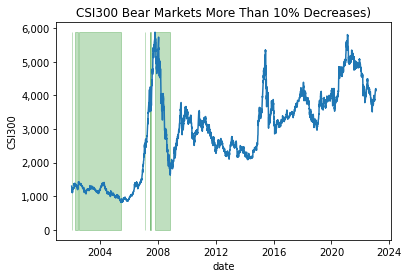

In [ ]:
CSI300 = CSI300_temp.copy()
# identiy bear regime for shanghai_index
CSI300 = CSI300.set_index(CSI300['date'], drop=True, append=False, inplace=False, verify_integrity=False)
# Just need the 
CSI300 = CSI300[['close']].copy()

CSI300['dd'] = CSI300['close'].div(CSI300['close'].cummax()).sub(1)
CSI300['ddn'] = ((CSI300['dd'] < 0.) & (CSI300['dd'].shift() == 0.)).cumsum()
CSI300['ddmax'] = CSI300.groupby('ddn')['dd'].transform('min')

CSI300['bear'] = (CSI300['ddmax'] < -0.1) & (CSI300['ddmax'] < CSI300.groupby('ddn')['dd'].transform('cummin'))
CSI300['bearn'] = ((CSI300['bear'] == True) & (CSI300['bear'].shift() == False)).cumsum()
bears = CSI300.reset_index().query('bear == True').groupby('bearn')['date'].agg(['min', 'max'])
print(bears)

CSI300['close'].plot()

for i, row in bears.iterrows():
    plt.fill_between(row, CSI300['close'].max(), alpha=0.25, color='g')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylabel('CSI300')
plt.title('CSI300 Bear Markets More Than 10% Decreases)')